# **Tabular Feasability: Predicting Waterborne Disease Counts Using Global Water Quality and Socioeconomic Indicators**
-----


## Defining Project: 

- Link: https://www.kaggle.com/datasets/khushikyad001/water-pollution-and-disease/data
- The Challenge: Predict waterborne disease counts, such as diarrheal, cholera, and typhoid cases,based on global water quality and socioeconomic data.
- Dataset Info:
    - Shape: (3000, 24)
    - Data types:
        - 20 numerical columns (e.g. pH level, GDP, rainfall)
        - 4 categorical columns (country, region, water source type, water treatment method)
-----

## **Data Loading and Initial Look**
- Dataset Size:(3000, 24)
- Data types:
  - 20 Numerical Columns, 4 Categorical (Country, Region, Water Treatment Method, Water Source Type)
- Missing Values:
  - Only Water Treatment Method has missing values (747)
- No duplicates
- No outliers

In [3]:
# importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# basline modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# load in data
df = pd.read_csv("water_pollution_disease.csv")
df.head()

,Country,Region,Year,Water Source Type,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),...,"Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
0,Mexico,North,2015,Lake,6.06,7.12,3.93,4.28,8.28,7.89,...,33,44,76.16,57057,96.92,84.61,63.23,2800,4.94,593
1,Brazil,West,2017,Well,5.24,7.84,4.79,3.86,15.74,14.68,...,27,8,77.30,17220,84.73,73.37,29.12,1572,16.93,234
2,Indonesia,Central,2022,Pond,0.24,6.43,0.79,3.42,36.67,9.96,...,39,50,48.45,86022,58.37,72.86,93.56,2074,21.73,57
3,Nigeria,East,2016,Well,7.91,6.71,1.96,3.12,36.92,6.77,...,33,13,95.66,31166,39.07,71.07,94.25,937,3.79,555
4,Mexico,South,2005,Well,0.12,8.16,4.22,9.15,49.35,12.51,...,31,68,58.78,25661,23.03,55.55,69.23,2295,31.44,414


In [5]:
df.shape

(3000, 24)

In [9]:
df.describe()

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.012667,4.954390,7.255847,2.480023,6.492850,25.08025,10.047913,2488.477333,64.612333,249.776667,24.25100,49.270000,50.811900,50036.196667,50.029193,50.062480,60.371007,1591.849000,20.130917,505.390333
std,7.229287,2.860072,0.720464,1.419984,2.027966,14.50517,5.798238,1431.421553,20.308463,144.111543,14.33259,28.984165,28.465323,28598.750508,28.896676,22.779125,23.159678,817.502434,11.689244,283.275224
min,2000.000000,0.000000,6.000000,0.000000,3.000000,0.05000,0.000000,0.000000,30.010000,0.000000,0.00000,0.000000,2.060000,521.000000,0.190000,10.030000,20.010000,200.000000,0.060000,10.000000
25%,2006.000000,2.560000,6.630000,1.257500,4.710000,12.52500,5.120000,1268.000000,47.027500,124.000000,12.00000,24.000000,26.467500,25010.250000,24.982500,30.557500,40.440000,865.750000,9.840000,254.750000
50%,2012.000000,4.950000,7.280000,2.460000,6.490000,24.79000,10.065000,2469.000000,64.780000,248.000000,24.00000,49.000000,50.230000,49621.500000,50.390000,49.795000,60.580000,1572.000000,20.175000,513.000000
75%,2018.000000,7.400000,7.870000,3.660000,8.252500,37.91000,15.032500,3736.250000,82.302500,378.000000,37.00000,75.000000,76.260000,74778.250000,74.817500,69.727500,80.420000,2308.250000,30.672500,745.000000
max,2024.000000,10.000000,8.500000,4.990000,10.000000,49.99000,20.000000,4998.000000,99.990000,499.000000,49.00000,99.000000,99.990000,99948.000000,99.980000,89.980000,99.990000,2999.000000,39.990000,999.000000


In [11]:
df.dtypes

Country                                           object
Region                                            object
Year                                               int64
Water Source Type                                 object
Contaminant Level (ppm)                          float64
pH Level                                         float64
Turbidity (NTU)                                  float64
Dissolved Oxygen (mg/L)                          float64
Nitrate Level (mg/L)                             float64
Lead Concentration (µg/L)                        float64
Bacteria Count (CFU/mL)                            int64
Water Treatment Method                            object
Access to Clean Water (% of Population)          float64
Diarrheal Cases per 100,000 people                 int64
Cholera Cases per 100,000 people                   int64
Typhoid Cases per 100,000 people                   int64
Infant Mortality Rate (per 1,000 live births)    float64
GDP per Capita (USD)           

In [13]:
df['Country'].unique()

array(['Mexico', 'Brazil', 'Indonesia', 'Nigeria', 'Ethiopia', 'China',
       'Bangladesh', 'India', 'USA', 'Pakistan'], dtype=object)

In [15]:
df['Region'].unique()

array(['North', 'West', 'Central', 'East', 'South'], dtype=object)

In [17]:
df['Water Treatment Method'].unique()

array(['Filtration', 'Boiling', nan, 'Chlorination'], dtype=object)

In [19]:
df['Water Source Type'].unique()

array(['Lake', 'Well', 'Pond', 'Tap', 'River', 'Spring'], dtype=object)

In [21]:
missing_data = df.isnull().sum() 
missing_data

Country                                            0
Region                                             0
Year                                               0
Water Source Type                                  0
Contaminant Level (ppm)                            0
pH Level                                           0
Turbidity (NTU)                                    0
Dissolved Oxygen (mg/L)                            0
Nitrate Level (mg/L)                               0
Lead Concentration (µg/L)                          0
Bacteria Count (CFU/mL)                            0
Water Treatment Method                           747
Access to Clean Water (% of Population)            0
Diarrheal Cases per 100,000 people                 0
Cholera Cases per 100,000 people                   0
Typhoid Cases per 100,000 people                   0
Infant Mortality Rate (per 1,000 live births)      0
GDP per Capita (USD)                               0
Healthcare Access Index (0-100)               

In [23]:
# look for possible duplicates
duplicates = df.duplicated().sum()
print('Number of duplicates:', duplicates)

Number of duplicates: 0


In [25]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# function to find outliers using IQR
def find_outliers(data, cols):
    q1 = data[cols].quantile(0.25)
    q3 = data[cols].quantile(0.75)
    iqr = q3 - q1 
    low_bound = q1 - 1.5 * iqr
    up_bound = q3 + 1.5 * iqr
    outliers = data[(data[cols] < low_bound) | (data[cols] > up_bound)]
    return outliers 

for cols in num_cols:
    outliers = find_outliers(df, cols)
    print(f"{cols}: {len(outliers)} outliers")

Year: 0 outliers
Contaminant Level (ppm): 0 outliers
pH Level: 0 outliers
Turbidity (NTU): 0 outliers
Dissolved Oxygen (mg/L): 0 outliers
Nitrate Level (mg/L): 0 outliers
Lead Concentration (µg/L): 0 outliers
Bacteria Count (CFU/mL): 0 outliers
Access to Clean Water (% of Population): 0 outliers
Diarrheal Cases per 100,000 people: 0 outliers
Cholera Cases per 100,000 people: 0 outliers
Typhoid Cases per 100,000 people: 0 outliers
Infant Mortality Rate (per 1,000 live births): 0 outliers
GDP per Capita (USD): 0 outliers
Healthcare Access Index (0-100): 0 outliers
Urbanization Rate (%): 0 outliers
Sanitation Coverage (% of Population): 0 outliers
Rainfall (mm per year): 0 outliers
Temperature (°C): 0 outliers
Population Density (people per km²): 0 outliers


-----
## **Data Visualization**

Observations:
- 'Diarrheal Cases per 100,000 people' have a higher range of cases than Cholera Cases and Typhoid Cases per 100,000 people overall
- All correlation values are low
- No extreme outliers, random scatterplots

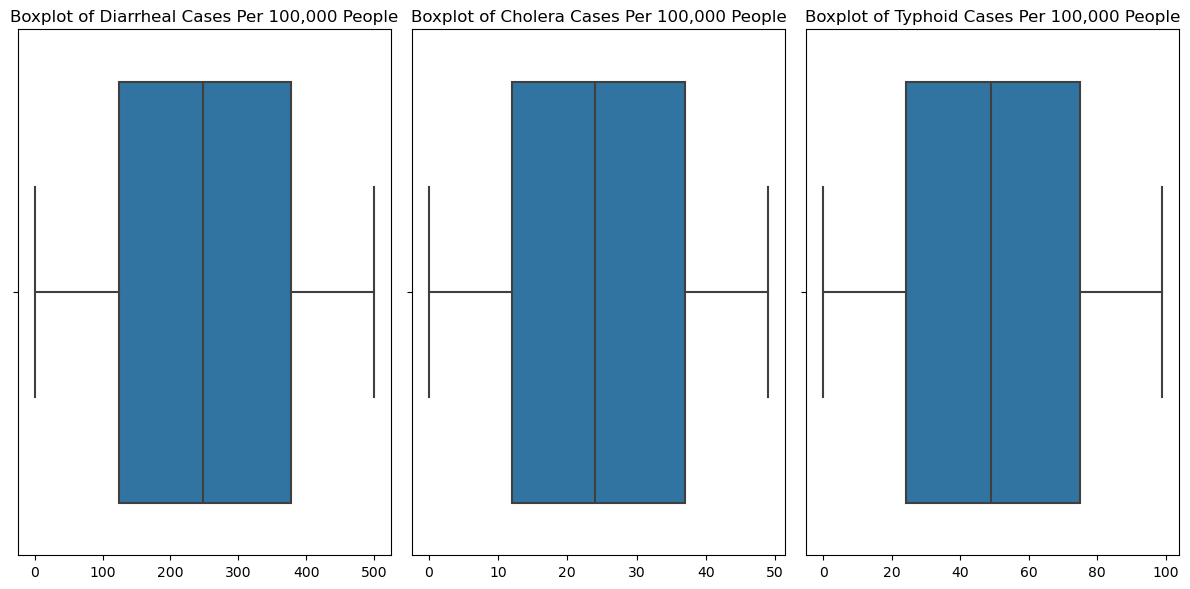

In [30]:
diseases = ['Diarrheal Cases per 100,000 people', 
          'Cholera Cases per 100,000 people',
          'Typhoid Cases per 100,000 people']

# boxplots for diseases 
plt.figure(figsize=(12, 6))
for i, col in enumerate(diseases):
    plt.subplot(1, 3, i + 1)  
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col.title()}")
    plt.xlabel('') 
    
plt.tight_layout()
plt.show()

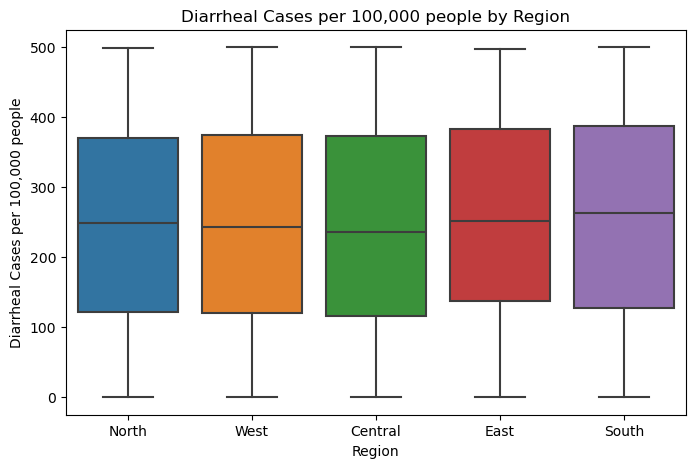

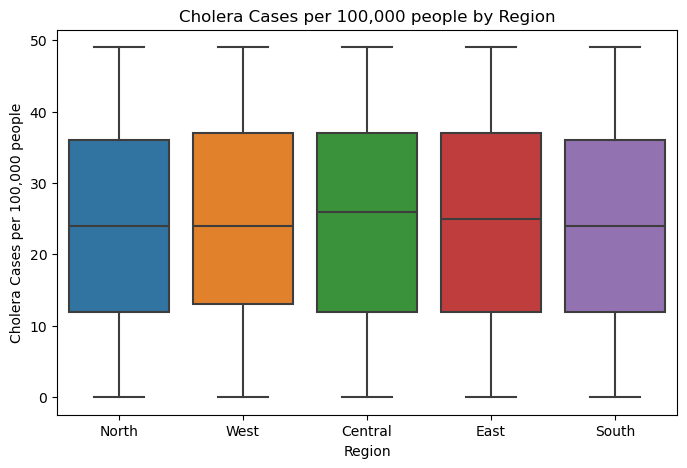

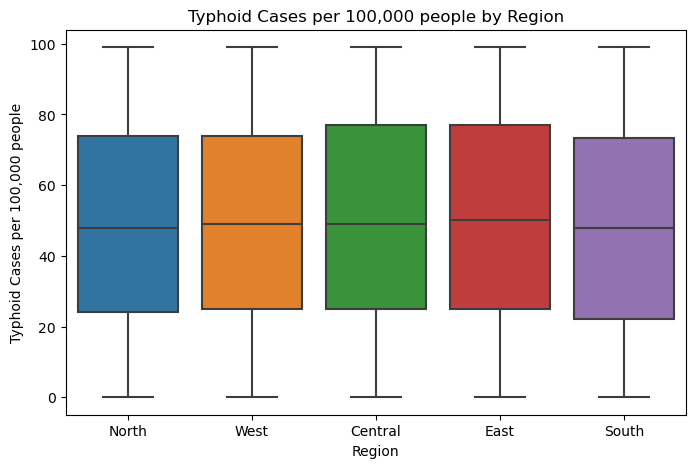

In [30]:
# boxplots by region
for target in diseases:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Region', y=target, data=df)
    plt.title(f"{target} by Region")
    plt.show()

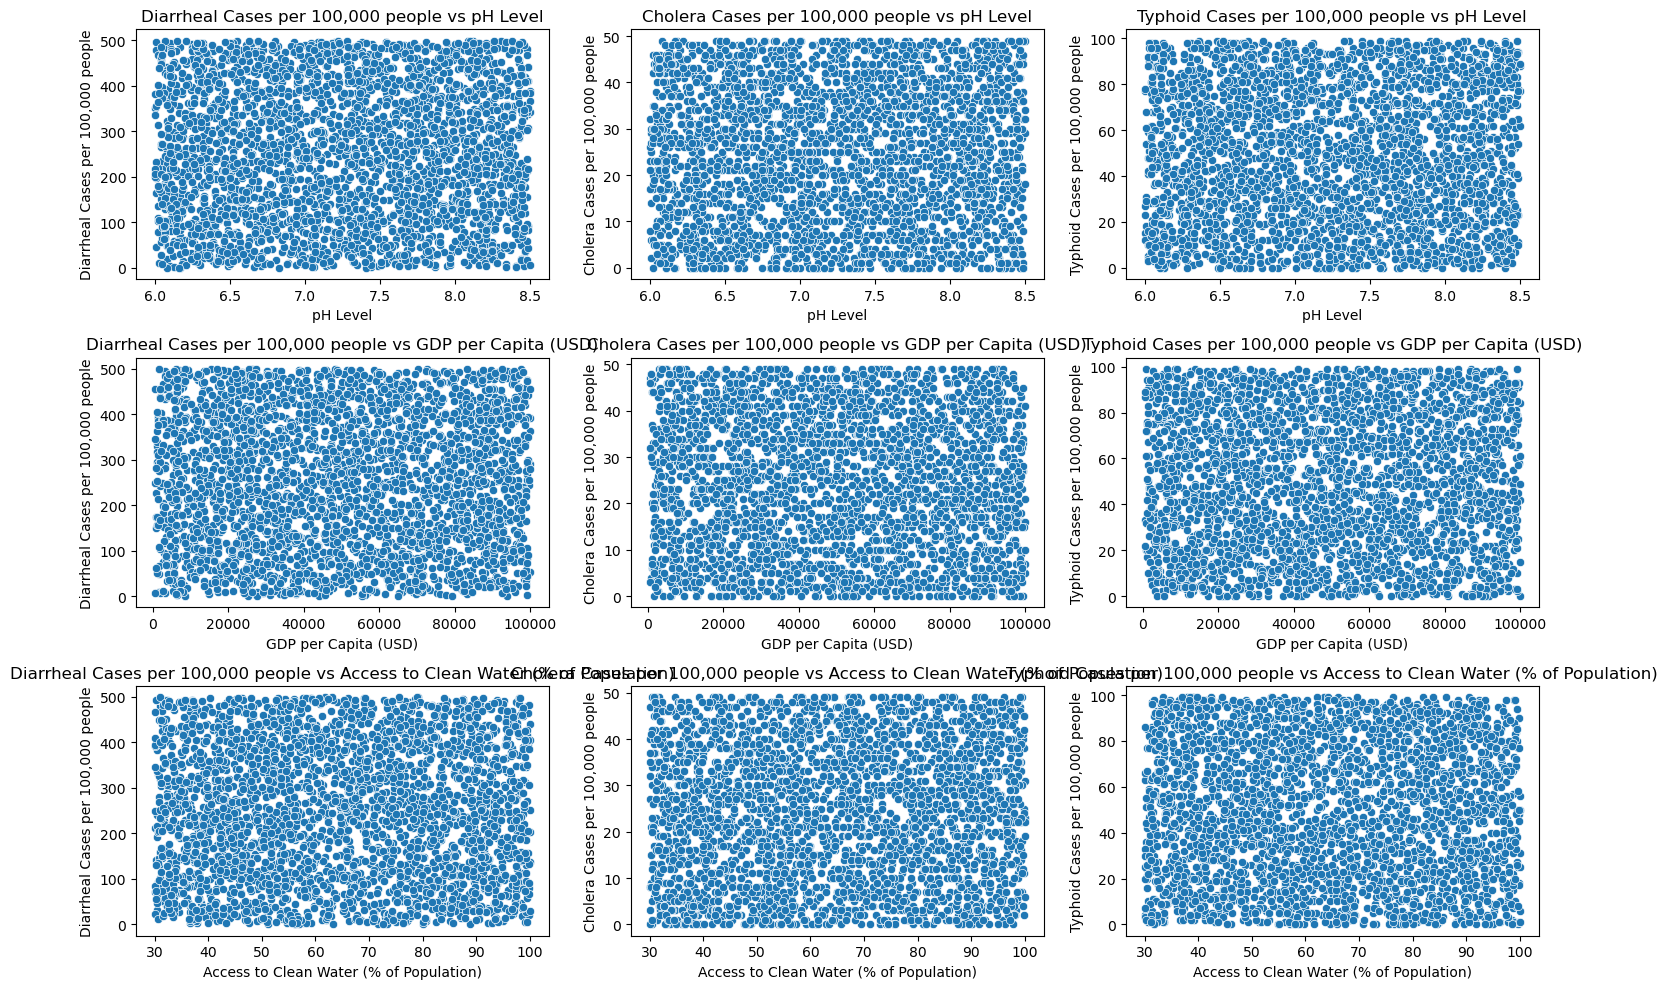

In [34]:
# targets vs possible test features scatterplots
t_features = ['pH Level', 'GDP per Capita (USD)', 'Access to Clean Water (% of Population)']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(t_features):
    for j, target in enumerate(diseases):
        plt.subplot(len(t_features), len(diseases), i * len(diseases) + j + 1)  # subplots
        sns.scatterplot(x=df[feature], y=df[target])
        plt.title(f"{target} vs {feature}")
        plt.xlabel(feature)
        plt.ylabel(target)

plt.tight_layout()
plt.show()

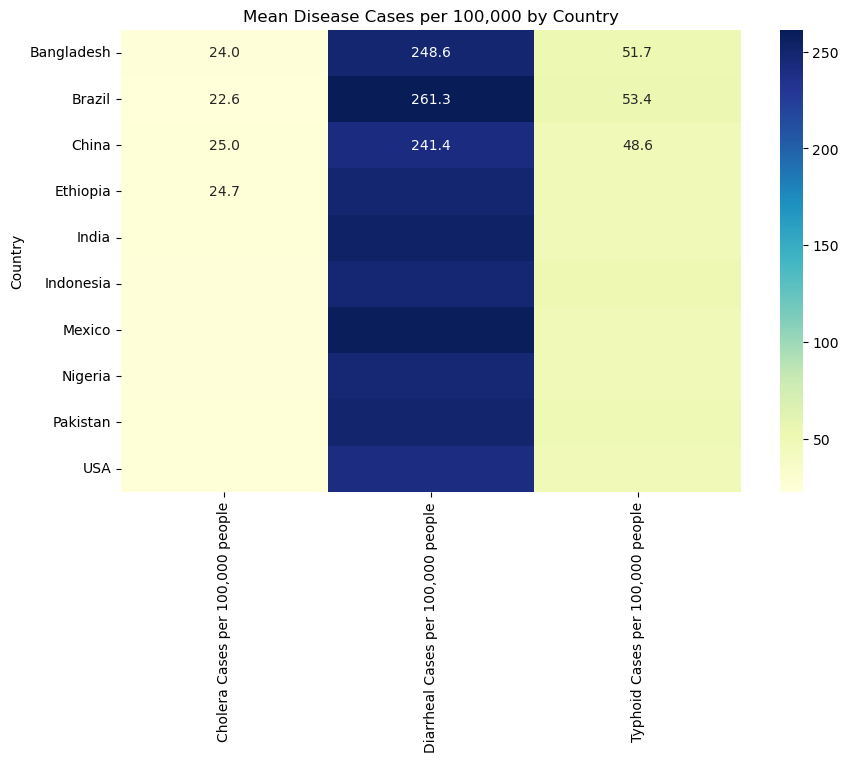

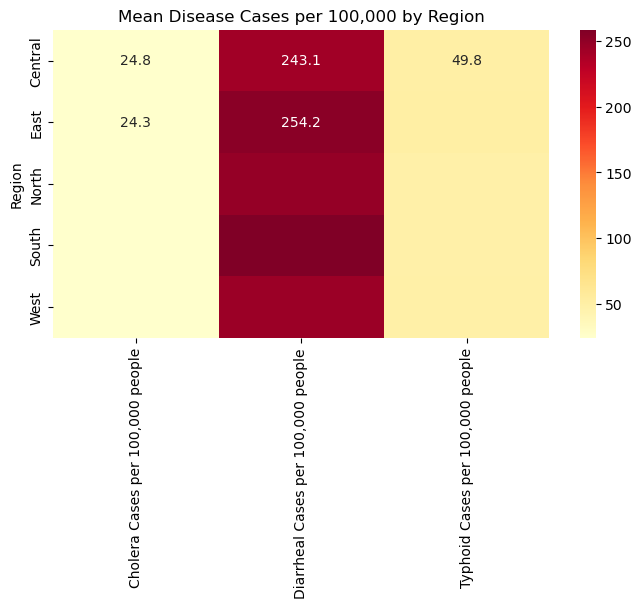

In [38]:
# heatmaps of categorical group means
pivot_table = df.pivot_table(values= diseases, index='Country', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Mean Disease Cases per 100,000 by Country")
plt.show()

pivot_table_region = df.pivot_table(values=diseases, index='Region', aggfunc='mean')
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table_region, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title("Mean Disease Cases per 100,000 by Region")
plt.show()

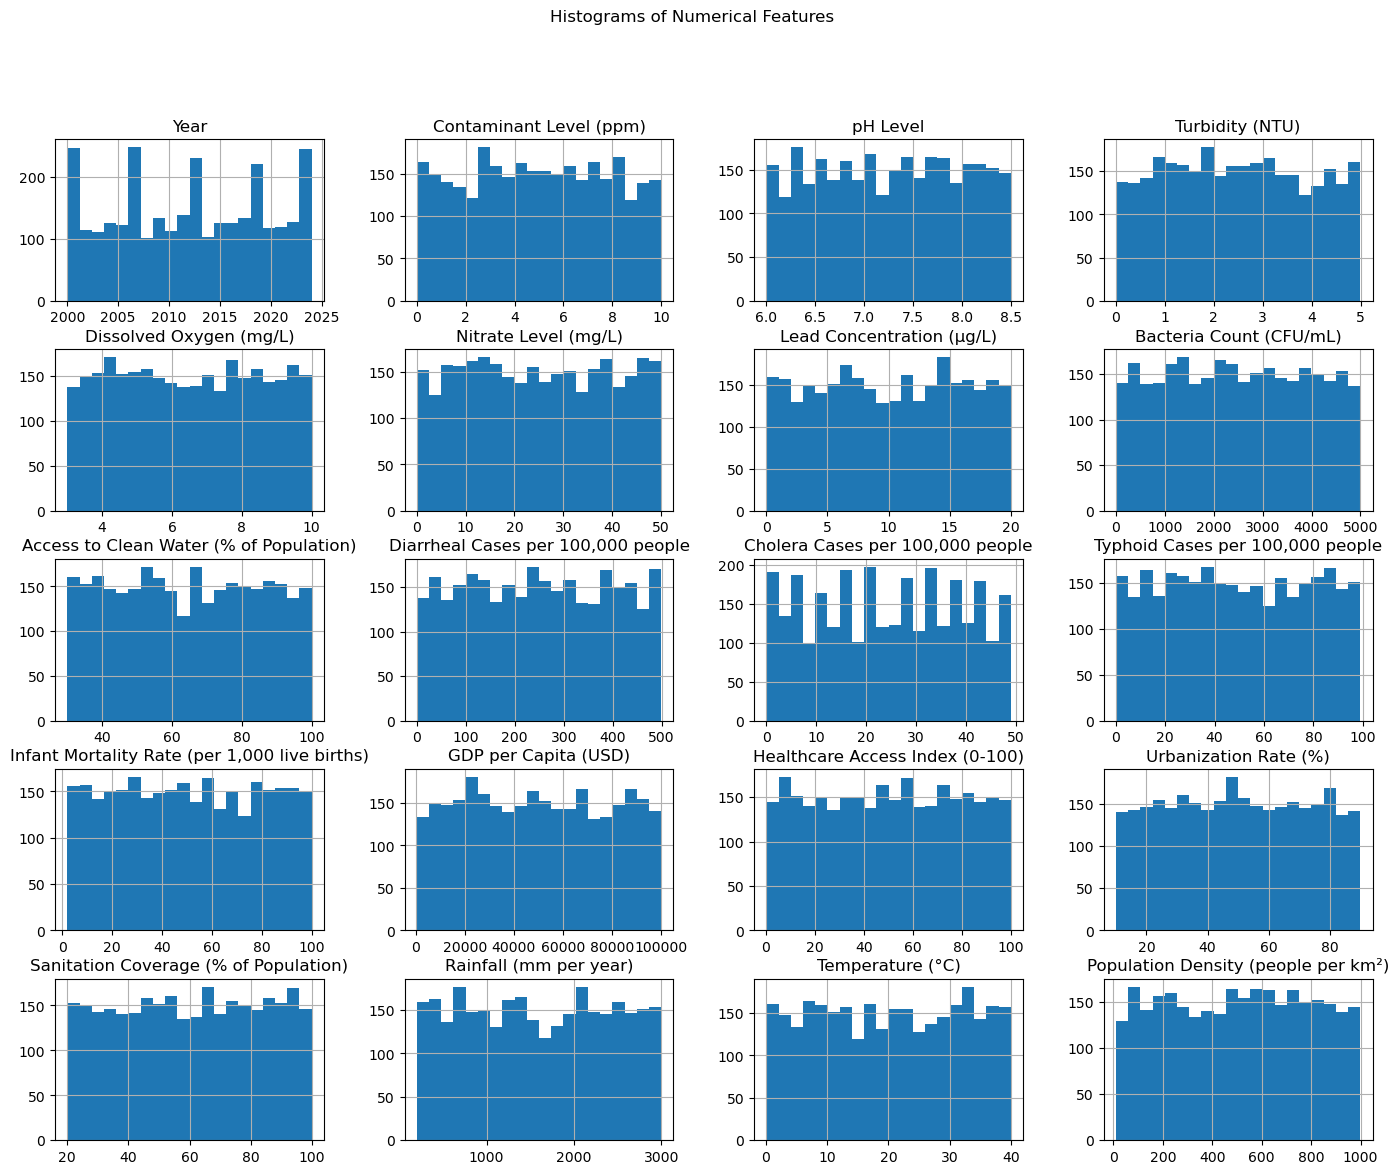

In [40]:
# histogram of numerical features
df.hist(figsize=(17, 13), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

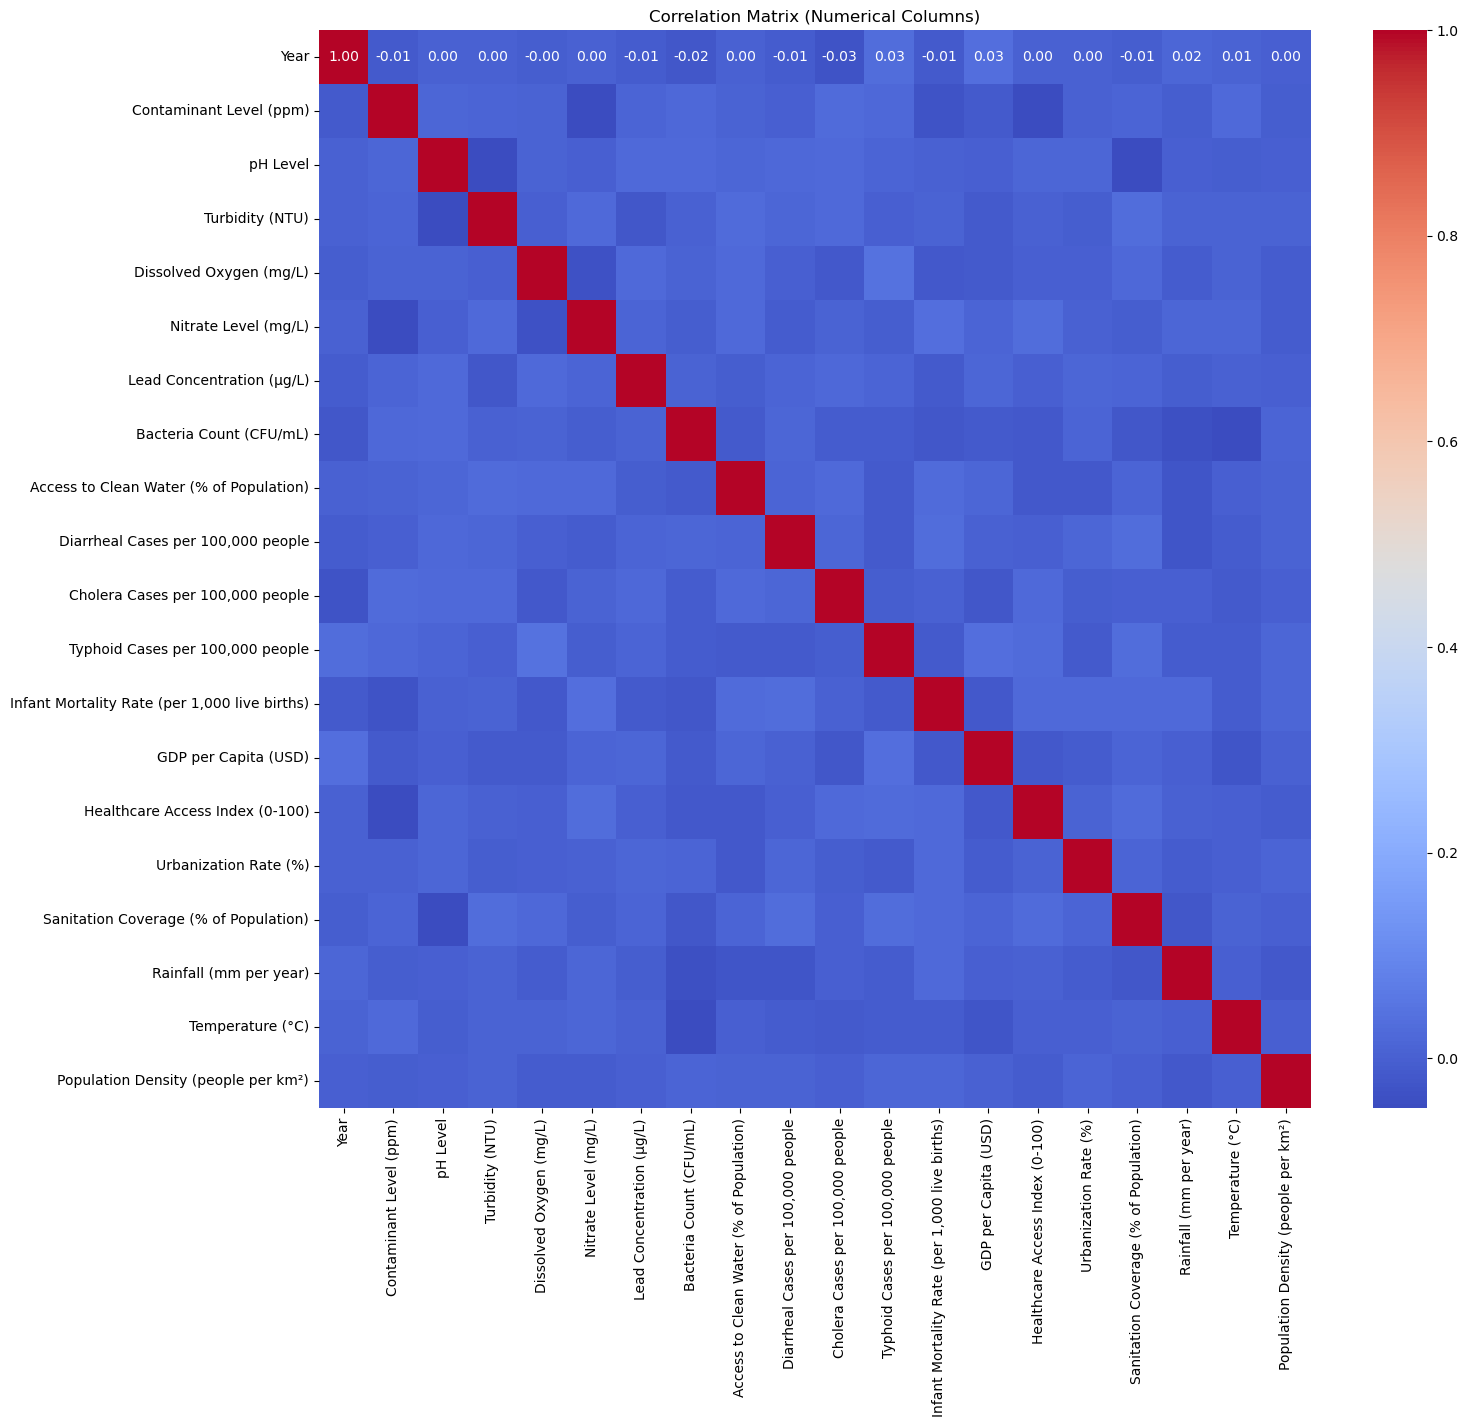

In [44]:
# target variables – correlation matrix
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(16, 14))  
# heatmap 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}) 
plt.title('Correlation Matrix (Numerical Columns)', fontsize=12)
plt.show()

In [40]:
# look at correlations again
df.corr(numeric_only=True)

,Year,Contaminant Level (ppm),pH Level,Turbidity (NTU),Dissolved Oxygen (mg/L),Nitrate Level (mg/L),Lead Concentration (µg/L),Bacteria Count (CFU/mL),Access to Clean Water (% of Population),"Diarrheal Cases per 100,000 people","Cholera Cases per 100,000 people","Typhoid Cases per 100,000 people","Infant Mortality Rate (per 1,000 live births)",GDP per Capita (USD),Healthcare Access Index (0-100),Urbanization Rate (%),Sanitation Coverage (% of Population),Rainfall (mm per year),Temperature (°C),Population Density (people per km²)
Year,1.000000,-0.012009,0.002086,0.002336,-0.004248,0.002293,-0.008076,-0.021711,0.004679,-0.009354,-0.030197,0.033197,-0.011524,0.033907,0.003756,0.004420,-0.006379,0.015574,0.007986,0.000411
Contaminant Level (ppm),-0.012009,1.000000,0.015832,0.012436,0.006122,-0.048365,0.012352,0.020452,0.005867,-0.002599,0.027019,0.020529,-0.028094,-0.015153,-0.045862,0.002442,0.012094,-0.005317,0.024128,-0.005532
pH Level,0.002086,0.015832,1.000000,-0.044292,0.007651,-0.000528,0.022519,0.022078,0.015276,0.018386,0.024828,0.011574,0.004177,-0.002972,0.015509,0.017085,-0.047860,-0.001774,-0.007290,-0.001965
Turbidity (NTU),0.002336,0.012436,-0.044292,1.000000,-0.000677,0.021619,-0.022772,0.002440,0.028929,0.016556,0.021453,-0.002389,0.006440,-0.015601,0.001364,-0.004110,0.030491,0.006596,0.007078,0.006886
Dissolved Oxygen (mg/L),-0.004248,0.006122,0.007651,-0.000677,1.000000,-0.033023,0.021765,0.005714,0.022059,-0.003231,-0.017889,0.041853,-0.018998,-0.015512,-0.001830,-0.001918,0.019067,-0.007434,0.008028,-0.010568
Nitrate Level (mg/L),0.002293,-0.048365,-0.000528,0.021619,-0.033023,1.000000,0.010875,-0.004577,0.023942,-0.010578,0.007948,-0.007345,0.037444,0.012970,0.029534,0.004033,-0.006235,0.016400,0.013920,-0.011292
Lead Concentration (µg/L),-0.008076,0.012352,0.022519,-0.022772,0.021765,0.010875,1.000000,0.006492,-0.007212,0.009597,0.018696,0.012994,-0.012964,0.016625,0.000638,0.015852,0.009590,-0.006791,0.004307,-0.002754
Bacteria Count (CFU/mL),-0.021711,0.020452,0.022078,0.002440,0.005714,-0.004577,0.006492,1.000000,-0.011875,0.015419,-0.010092,-0.011258,-0.020969,-0.012221,-0.017679,0.012910,-0.020361,-0.039331,-0.046582,0.009718
Access to Clean Water (% of Population),0.004679,0.005867,0.015276,0.028929,0.022059,0.023942,-0.007212,-0.011875,1.000000,0.009076,0.022508,-0.015023,0.027276,0.016690,-0.016930,-0.017113,0.012890,-0.024775,-0.000029,0.008631
"Diarrheal Cases per 100,000 people",-0.009354,-0.002599,0.018386,0.016556,-0.003231,-0.010578,0.009597,0.015419,0.009076,1.000000,0.014747,-0.012675,0.031683,0.002447,-0.000706,0.015574,0.033032,-0.023887,-0.007984,0.006277


-----
## **Data Cleaning and Preperation for ML**

In [43]:
# preprocessing time

# making a preprocessing df
df_pre = df.copy()

# target cols
target_cols = [
    'Diarrheal Cases per 100,000 people',
    'Cholera Cases per 100,000 people',
    'Typhoid Cases per 100,000 people'
]

# categorical and numerical features
cat_cols = ['Country', 'Region', 'Water Source Type', 'Water Treatment Method']
num_cols = [col for col in df_pre.columns if col not in cat_cols + target_cols + ['Year']]

print("Categorical Features:", cat_cols)
print("\n\nNumerical Features:", num_cols)

Categorical Features: ['Country', 'Region', 'Water Source Type', 'Water Treatment Method']


Numerical Features: ['Contaminant Level (ppm)', 'pH Level', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Nitrate Level (mg/L)', 'Lead Concentration (µg/L)', 'Bacteria Count (CFU/mL)', 'Access to Clean Water (% of Population)', 'Infant Mortality Rate (per 1,000 live births)', 'GDP per Capita (USD)', 'Healthcare Access Index (0-100)', 'Urbanization Rate (%)', 'Sanitation Coverage (% of Population)', 'Rainfall (mm per year)', 'Temperature (°C)', 'Population Density (people per km²)']


In [45]:
# handling missing values
df_pre['Water Treatment Method'] = df_pre['Water Treatment Method'].fillna('Unknown')

# check
df_pre['Water Treatment Method'].value_counts(dropna=False)

Water Treatment Method
Boiling         777
Chlorination    748
Unknown         747
Filtration      728
Name: count, dtype: int64

In [47]:
# save for a baseline model 
df_pre.to_csv('df_baseline.csv', index=False)